# Fireveg DB - overview of trait coverage

Author: [José R. Ferrer-Paris](https://github.com/jrfep) and [Ada Sánchez-Mercado](https://github.com/adasanchez)

Date: January 2025

This Jupyter Notebook includes **R code to analyse and visualise** data exported from the Fireveg Database. 

Here we will read input from a public data record of the database to answer some questions about the data coverage of the database.

```mermaid
flowchart LR
    Litrev & Form  --> Fireveg --> DR --> Code --> Q1 & Q2 & Q3
    Q2 --> Q4 & Q5 & Q6
    Fireveg[(Fireveg\nDatabase)]
    Litrev[Field work\ndata stream] 
    Form[Existing sources\n data stream] 
    BioNet(BioNet Atlas\nSpecies list) 
    BioNet -.-> Fireveg
    Code{R code\nfor analysis}:::ThisRepo
    DR[Exported\nData Record\nVersion 1.1]
    Q3["Q2. ..."]
    Q2["Q3. Trait values\n(NSW plant species)"]:::ThisRepo
    Q1["Q1. ..."]    
    Q4["Q2.1 ..."]:::ThisRepo   
    Q5["Q2.2 ..."]:::ThisRepo
    Q6["Q2.3 etc."]:::ThisRepo
classDef ThisRepo fill:none,stroke:black,color:black;
```

## Set-up

### Load packages

In [1]:
library(ggplot2)
library(dplyr)
require(tidyr)
library(readr)
library(stringr)
library(waffle)
library(ggtext)
library(cowplot)
library(readxl)    # For reading data in Excel format
library(forcats)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr



For [Markdown display from a code cell](https://stackoverflow.com/questions/35786496/using-r-in-jupyter-display-markdown-in-loop?rq=4).

In [2]:
library(IRdisplay)

For data download from cloud storage

In [3]:
require(osfr)
library(jsonlite)
library(httr)

Loading required package: osfr

Automatically registered OSF personal access token

Warning message:
“package ‘jsonlite’ was built under R version 4.3.3”


### Paths for inputs and outputs

Locate the root directory of the repo

In [4]:
here::i_am("Notebooks/22-Overview-field-records.ipynb")

here() starts at /Users/z3529065/proyectos/fireveg/fireveg-analysis



Relative path to local data files within project repository

In [5]:
data_dir <- here::here("data")
if (!dir.exists(data_dir))
    dir.create(data_dir)

### Read data from local folder

<div class="alert alert-info">
     <img src='../img/open-data-2.png' width=25 alt="open data icon"/>
Data for this Notebook is available from the following repositories:

> Ferrer-Paris, J. R., Keith, D., & Sánchez-Mercado, A. (2024, August 15). Export data records from Fire Ecology Traits for Plants database. Retrieved from [osf.io/h96q2](https://osf.io/h96q2/)

and 
> Ferrer-Paris, J. R.; Keith, D. (2024). Fire Ecology Traits for Plants: Database exports. figshare. Dataset. Retrieved from <https://doi.org/10.6084/m9.figshare.24125088.v2>
</div>

See notebook [00-Data-download](00-Data-download.ipynb) for instructions on how to download the data programatically with R.

The data is now available in our local data folder and we can use `read_csv` functions to read `CSV` files:

In [6]:
field_records <- read_csv(here::here(data_dir, "figshare_data", "fireveg-field-records.csv"), 
                          col_types = "dcDdcddccddddddddccc")

New names:
• `` -> `...1`


In [7]:
species_list <- read_excel(here::here(data_dir, "figshare_data","fireveg-field-report-model.xlsx"), sheet = 4) |> 
    filter(!duplicated(tolower(`Scientific name (as entered)`))) |> # clean some duplicates
    mutate(Family = recode(Family, 
                         "Fabaceae (Faboideae)" = "Fabaceae")) # Fix one family name

In [8]:

full_spp_trait <- field_records |>
    filter(!is.na(species_code)) |>
  mutate(spp_type = case_when(
    resprout_organ %in% c("None") ~ "Seeder", 
    TRUE ~ "Resprouter")
  ) |>
 # left_join(species_list, by = c("species" = "Scientific name (as entered)")) |> # Add family information
  left_join(distinct(species_list), by = c("species_code" = "CAPS code")) 


In [14]:
head(full_spp_trait)

...1,visit_id,visit_date,sample_nr,species,species_code,bionet_code,resprout_organ,seedbank,adults_unburnt,⋯,comments,spp_type,Family,Scientific name (as entered),Authorship,Vernacular name,Taxon rank,BioNET id,Current code,Current name (according to BioNET)
<dbl>,<chr>,<date>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
0,AlpAsh_18,2021-04-15,1,Cassinia aculeata,1360,1360,None,Soil-persistent,0,⋯,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics', 'seedbank written as persistent soil']",Seeder,Asteraceae,Cassinia aculeata,(Labill.) R.Br.,Dolly Bush,Species,11344,NA,NA
1,AlpAsh_18,2021-04-15,1,Olearia erubescens,1591,1591,Basal,Non-canopy,0,⋯,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics']",Resprouter,Asteraceae,Olearia erubescens,(Sieber ex DC.) Dippel,Pink-tip Daisy-bush,Species,7360,NA,NA
2,AlpAsh_18,2021-04-15,1,Daviesia ulicifolia,2827,2827,Basal,Soil-persistent,0,⋯,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics', 'seedbank written as persistent soil']",Resprouter,Fabaceae,Daviesia ulicifolia,Andrews,Gorse Bitter Pea,Species,11192,NA,NA
3,AlpAsh_18,2021-04-15,1,Gonocarpus montanus,3244,3244,NA,Soil-persistent,0,⋯,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics', 'seedbank written as persistent soil']",Resprouter,Haloragaceae,Gonocarpus montanus,(Hook.f.) Orchard,NA,Species,8292,NA,NA
4,AlpAsh_18,2021-04-15,1,Arthropodium milleflorum,3517,3517,Tuber,Transient,0,⋯,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics']",Resprouter,Asparagaceae,Arthropodium milleflorum,(DC.) J.F.Macbr.,Pale Vanilla-lily,Species,7469,NA,NA
5,AlpAsh_18,2021-04-15,1,Acacia obliquinervia,3837,3837,Basal,Soil-persistent,0,⋯,"['Imported from workbook UNSW_VegFireResponse_KNP AlpAsh_firehistupdate.xlsx using python script', 'Imported from spreadsheet Floristics', 'seedbank written as persistent soil']",Resprouter,Fabaceae (Mimosoideae),Acacia obliquinervia,Tindale,Mountain Hickory,Species,7097,NA,NA


Select the top 5 families -----
 Which are the families with more spp?

In [10]:
top_families <- species_list |>
    filter(!is.na(Family)) |>
  group_by(Family) |>
  summarise(
    n_spp = n_distinct(`Scientific name (as entered)`)
  ) |>
  arrange(desc(n_spp)) |>
  slice_head( n = 5 ) |>
  pull(Family)

In [11]:

       #title = "<b>Distribution of species count by seedbank type<b>",
       #subtitle = "Variation in seedbank strategies among the top 5 families") +
plot_seedbank <- full_spp_trait|> 
  filter(Family %in% top_families) |>
  filter(!is.na(seedbank)) |>
  group_by(Family, seedbank) |>
  summarise(n_species = n_distinct(species), .groups = "drop") |>
  arrange(n_species) |> 
  mutate(seedbank = fct_reorder(seedbank, desc(n_species))) |>
  ggplot(aes(x = seedbank, y = n_species)) +
  geom_bar(stat="identity", fill = "black") +
  facet_grid(~ Family) +
  ylim(0, 60) +
  coord_flip() +
  labs(y = "Number of species",
       x = "") +
  theme_classic() +
  theme(plot.title = element_markdown(), # Enable markdown for title and subtitle
        plot.subtitle = element_markdown())


In [12]:
#title = "<b>Distribution of species count by resprout organ<b>",
#       subtitle = "Variation in resprouting strategies among the top 5 families"
plot_organ_type <- full_spp_trait|> 
  filter(Family %in% top_families) |>
  filter(!is.na(resprout_organ)) |>
  group_by(Family, resprout_organ) |>
  summarise(n_species = n_distinct(species), .groups = "drop") |>
  arrange(n_species) |> 
  mutate(resprout_organ = fct_reorder(resprout_organ, desc(n_species))) |>
  ggplot(aes(x = resprout_organ, y = n_species)) +
  geom_bar(stat="identity", fill = "black") +
  facet_grid(~ Family) +
  coord_flip() +
  ylim(0, 60) +
  labs(y = "Number of species",
       x = "") +
  theme_classic() +
  theme(plot.title=element_markdown(), # Enable markdown for title and subtitle
        plot.subtitle=element_markdown())


Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_bar()`).”


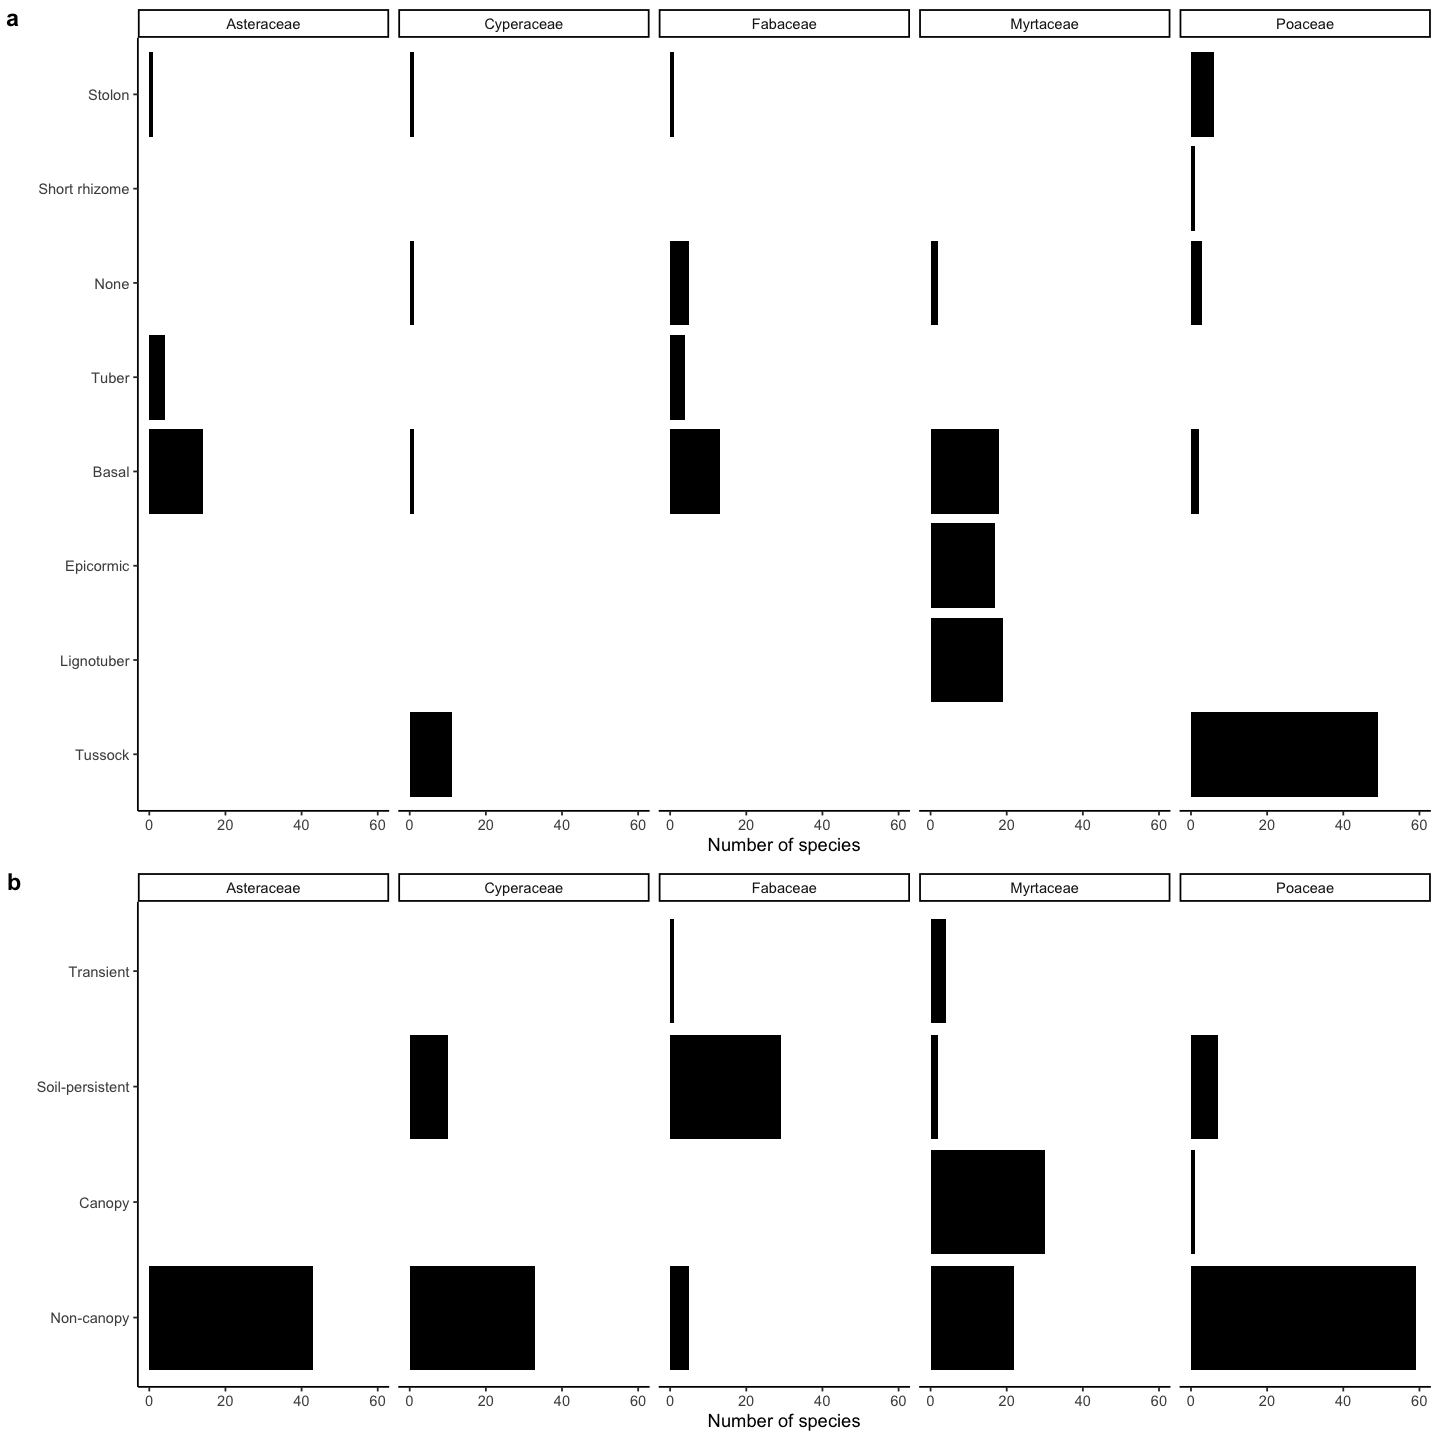

In [13]:
options(repr.plot.width=12, repr.plot.height=12) # Make plot larger
plot_grid(plot_organ_type, plot_seedbank, 
           align = "vh",
          labels = "auto",
          rel_heights = c(3, 2),
         ncol = 1)

## That is it for now!

✅ Job done! 😎👌🔥

You can:
- go [back home](../Instructions-and-workflow.ipynb),
- continue navigating the repo on [GitHub](https://github.com/ces-unsw-edu-au/fireveg-analysis)
- continue exploring the repo on [OSF](https://osf.io/h96q2/).
- visit the database at <http://fireecologyplants.net>